#### **we first starting by importing the loader**

In [1]:
from kloppy import pff #import the loader which is commonly the name of the data provider.

##### **Path to the necessaries files to load with kolppy, the final match (game_id=10517) of the 2022 world cup.**

In [2]:
roster = "/home/student/Documents/AIMS/Intership/pysport/pysport-aims/first_week/data/10517_roster.json"
metadata = "/home/student/Documents/AIMS/Intership/pysport/pysport-aims/first_week/data/10517_metadata.json"
raw_data = "/home/student/Documents/AIMS/Intership/pysport/pysport-aims/first_week/data/pff_10517.jsonl.bz2"

##### **using the path variables and the load_tracking() function of the pff loader, we load the game data.**

In [3]:
dataset = pff.load_tracking(
    meta_data= metadata,
    roster_meta_data= roster,
    raw_data = raw_data,
    # Optional Parameters
    coordinates = "pff", # here we specify that we are going to use the pff pitch size and  orientation
    sample_rate = None, # we keep the number (or the proportion) of loaded frame as given by the provider number of frame per second
    limit = None # We load the total frames available wich are around (5400 seconds * 25 frames per second)
)

In [4]:
# let take a look of how many frames it contains
print(f"Te dataset contains {len(dataset)} frames. ")

# we first start by cheking the approximative number of minute recorded
def what_is_this(frame_rate=25):
    total_recorded_time  = len(dataset)/frame_rate
    time_in_min = total_recorded_time/60                # to get the result in minutes
    print(f"This is the record of around {time_in_min:0.2f} min of the 2022 football final world cup ")

what_is_this()

Te dataset contains 130308 frames. 
This is the record of around 86.87 min of the 2022 football final world cup 


##### **Strange... it seems like the number of frames doesn't match with our excpectation**

##### **Assumptions**
- the number of frame is not 25 per second but less than this.
- the provider doesn't provide record of the entire game.

In [5]:
# let go into attribute of the data_loaded
def of_type(data):
    return data.dataset_type.name

print(f"This is a {of_type(dataset)} dataset.")

This is a TRACKING dataset.


##### **implement some functions available on Tracking Dataset to navigate within the data**

In [6]:
# exploration of metadata variabes
dataset.metadata?

Type:        Metadata
String form: Metadata(periods=[Period(id=1, start_timestamp=datetime.timedelta(seconds=154, microseconds=48782 <...> .utc), game_week=8, game_id=10517, home_coach=None, away_coach=None, officials=[], attributes={})
File:        ~/miniconda3/envs/pysport_env/lib/python3.11/site-packages/kloppy/domain/models/common.py
Docstring:  
Metadata for a dataset.

Metadata is additional information about the dataset that is not part of
the actual data. It includes information about the teams, the pitch
dimensions, the orientation, the provider, and more.

Attributes:
    game_id: Game id of the game from the provider.
    date: Date of the game.
    game_week: Game week (or match day) of the game. It can also be the stage
        (ex: "8th Finals"), if the game is happening during a cup or a play-off.
    periods: List of [`Period`][kloppy.domain.models.common.Period] entities.
    teams: `[home_team, away_team]`.
    coordinate_system: The coordinate system in which the dat

In [7]:
# this give us some variable to handle informations about the game store in metadata 
# here we see that we can access the game_id, the date were the match was play the stage of the competion or the game_week
# the informations about the teams, the final score and important ploting information like the pitch dimension the attacking orientation and the cordinate system.
# Also we have extra information like the provider the frame_rate and the periods. 

In [8]:
# Let remember when was the 2022 football final word cup
print(f"The 2022 football final word cups final was played the {dataset.metadata.date.date()} at {dataset.metadata.date.time() }")
print(f"score: {dataset.metadata.score}")

The 2022 football final word cups final was played the 2022-12-18 at 15:00:00
score: None


**ahaaa the final score is not provided....**

In [9]:
# let check what we can have with the teams variable
teams = dataset.metadata.teams # as precise up there we expect here a list of two variable the home and the away team
type(teams)

list

In [10]:
# what type of variable is a team
print(f"object of type: {teams[0].__class__.__name__} \nor more precisely {type(teams[0])}")

object of type: Team 
or more precisely <class 'kloppy.domain.models.common.Team'>


In [11]:
# wath are the attribute of a team ?
home_team ,away_team = teams
home_team?

Type:        Team
String form: Argentina
File:        ~/miniconda3/envs/pysport_env/lib/python3.11/site-packages/kloppy/domain/models/common.py
Docstring:  
A team in a match.

Attributes:
    team_id (str): Identifier given by the provider.
    name (str): Readable name of the team.
    ground (Ground): The team's ground (home or away).
    players (List[Player]): The team's players.
    starting_formation (FormationType, optional): The team's starting formation.

In [12]:
# here we see that we can access the team name,ID,starting formation, if the team play as home or away team and the list of player of the team.
print(f"this was a match between {home_team.name} and {away_team.name}")
print(home_team.starting_formation,away_team.starting_formation)

this was a match between Argentina and France
None None


In [13]:
# even the starting formations are not provided

In [14]:
# Check the list of players
home_team.players

[Player(player_id='13222', team=Team(team_id='364', name='Argentina', ground=home, starting_formation=None, formations=<TimeContainer>, players=[..., Player(player_id='8058', team=..., jersey_no=21, first_name=None, last_name=None, name='Paulo Dybala', starting=None, starting_position=<PositionType.Striker: ('Striker', 'ST', 'Attacker')>, positions=<TimeContainer>, attributes={}), Player(player_id='8025', team=..., jersey_no=3, first_name=None, last_name=None, name='Nicolas Tagliafico', starting=None, starting_position=<PositionType.LeftBack: ('Left Back', 'LB', 'FullBack')>, positions=<TimeContainer>, attributes={}), Player(player_id='1389', team=..., jersey_no=15, first_name=None, last_name=None, name='Angel Correa', starting=None, starting_position=<PositionType.Striker: ('Striker', 'ST', 'Attacker')>, positions=<TimeContainer>, attributes={}), Player(player_id='10715', team=..., jersey_no=9, first_name=None, last_name=None, name='Julian Alvarez', starting=None, starting_position=<P

In [15]:
# in a more readable way
import pandas as pd
home_players = {home_team.name+"_players" : home_team.players}
df_players = pd.DataFrame(home_players)
df_players

,Argentina_players
0,Nahuel Molina
1,Paulo Dybala
2,Nicolas Tagliafico
3,Angel Correa
4,Julian Alvarez
5,Lisandro Martinez
6,Geronimo Rulli
7,Cristian Romero
8,Emiliano Martínez
9,Guido Rodríguez


In [16]:
# which other informations can we get from the player
home_team.players[0]?

Type:        Player
String form: Nahuel Molina
File:        ~/miniconda3/envs/pysport_env/lib/python3.11/site-packages/kloppy/domain/models/common.py
Docstring:  
A player in a team.

Attributes:
    player_id (str): Identifier given by the provider.
    team (team): The player's team.
    jersey_no (int): The player's jersey number.
    first_name (str, optional): The player's first name.
    last_name (str, optional): The player's last name.
    name (str, optional): Full name of the player.
    full_name (str): If `name` is not set, this will be the concatenation
        of `first_name` and `last_name` or if these are also not set,
        the concatenation of the team's ground and the jersey number.
    starting (bool): `True` when player is part of the starting XI.
    starting_position (Position, optional): The player's starting position
        or `None` if the player is not starting.
    poisitions (TimeContainer[Position]): The player's positions over time.
    attributes (dic

In [17]:
# Let make our players dataframe more valuable with more insightfull information like the jersey number as index,
# the full name position of the player the value wich let us know if it has start the game or no at the beginig
# and its starting_position.
home_players = {"_players_team" : [player.team for player in home_team.players],
                "_players_name" : [player.full_name for player in home_team.players],
                "jersey_no": [player.jersey_no for player in home_team.players],
                "_has_start": [player.starting for player in home_team.players],
                "player_position": [player.starting_position for player in home_team.players],
                }
df_players = pd.DataFrame(home_players)

# Set index and sort in descending order
df_players = df_players.set_index("jersey_no").sort_index(ascending=True)

df_players


,_players_team,_players_name,_has_start,player_position
jersey_no,,,,
1,Argentina,Franco Armani,None,Goalkeeper
2,Argentina,Juan Foyth,None,Right Back
3,Argentina,Nicolas Tagliafico,None,Left Back
4,Argentina,Gonzalo Montiel,None,Right Back
5,Argentina,Leandro Paredes,None,Defensive Midfield
6,Argentina,German Pezzella,None,Right Center Back
7,Argentina,Rodrigo de Paul,None,Center Midfield
8,Argentina,Marcos Acuña,None,Left Back
9,Argentina,Julian Alvarez,None,Striker


In [18]:
# let go back into another metadat the frame_rate 
dataset.metadata.frame_rate

29.97

In [19]:
# nice the frame rate was not 25 per second but 29.97 which is strange.
what_is_this(frame_rate=int(dataset.metadata.frame_rate))

# compare to the time on wich the last frame were recorded
print(dataset.frames[-1].time)

This is the record of around 74.89 min of the 2022 football final world cup 
P4T19:01


In [20]:
# this become more fishy, what is going on here ?

## remenber to ask question on it..(what represent the time attribute of a frame ?)
### Also ask question about how the tracking data time are formated.

In [21]:
# let look at coordinate_system, pitch_dimensions,and the orientation
print(dataset.metadata.coordinate_system,dataset.metadata.pitch_dimensions,dataset.metadata.orientation)

<kloppy.domain.models.common.PFFCoordinateSystem object at 0x7f5e19aee610> MetricPitchDimensions(x_dim=Dimension(min=-52.5, max=52.5), y_dim=Dimension(min=-34.0, max=34.0), standardized=False, unit=<Unit.METERS: 'm'>, goal_width=7.32, goal_height=2.44, six_yard_width=18.32, six_yard_length=5.5, penalty_area_width=40.32, penalty_area_length=16.5, circle_radius=9.15, corner_radius=1, penalty_spot_distance=11, penalty_arc_radius=9.15, pitch_length=105.0, pitch_width=68.0) Orientation.HOME_AWAY


In [22]:
# we gain no more information on coordinate_system
# we see here that the pitch was on 105m X 68m non standardized, with the different dimension of goal, six-yard and penalty_area
# and the information about the orinetation join to the definition in the documentation tell us that "The home team plays from left to right in the first period. The away team plays from left to right in the second period" 

In [23]:
dataset.metadata.coordinate_system?

Type:        PFFCoordinateSystem
String form: <kloppy.domain.models.common.PFFCoordinateSystem object at 0x7f5e19aee610>
File:        ~/miniconda3/envs/pysport_env/lib/python3.11/site-packages/kloppy/domain/models/common.py
Docstring:  
PFF coordinate system.

Uses a pitch with the origin at the center and the y-axis oriented
from bottom to top. The coordinates are in meters.

In [24]:
# earlier we directly dive into the metadata variable but let go back to the dataset one and see what we have
dataset?

Type:        TrackingDataset
String form: <TrackingDataset record_count=130308>
Length:      130308
File:        ~/miniconda3/envs/pysport_env/lib/python3.11/site-packages/kloppy/domain/models/tracking.py
Docstring:  
A tracking dataset.

Attributes:
    dataset_type: The type of the dataset.
    records: List of records in the dataset.
    metadata: Metadata for the dataset.
    dataset_type (DatasetType): `"DatasetType.TRACKING"`
    frames (List[Frame]): A list of frames. Alias for `records`.
    frame_rate (float): The frame rate (in Hertz) at which the data was recorded.
    metadata (Metadata): Metadata of the tracking dataset.

**Good... here we see that apart from the metadata and the data_type that we saw earlier we can also access to the records frames and allso we have again the frame_rate here** 

In [25]:
# Let start handling the frames
type(dataset.frames) # check first what are records or frames

list

In [26]:
# Good they are list let get them as dataframe using the inbuilt method to_df()
df = dataset.to_df()
df

,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,ball_speed,10715_x,...,13226_d,13226_s,8058_x,8058_y,8058_d,8058_s,3878_x,3878_y,3878_d,3878_s
0,1,0 days 00:00:00.000821,4630,alive,363,0.42,1.59,0.39,None,4.987,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
1,1,0 days 00:00:00.034188,4631,alive,363,0.83,1.63,0.00,None,4.955,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
2,1,0 days 00:00:00.067555,4632,alive,363,1.23,1.66,0.00,None,4.923,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
3,1,0 days 00:00:00.100921,4633,alive,363,1.64,1.70,0.02,None,4.892,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
4,1,0 days 00:00:00.134288,4634,alive,363,2.04,1.73,0.02,None,4.861,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130303,4,0 days 00:19:00.506736,264807,alive,363,-47.37,-23.96,8.87,None,NaN,...,None,None,-34.798,-15.228,None,None,-31.447,-8.301,None,None
130304,4,0 days 00:19:00.540102,264808,alive,363,-47.33,-24.05,8.77,None,NaN,...,None,None,-34.751,-15.238,None,None,-31.463,-8.330,None,None
130305,4,0 days 00:19:00.573469,264809,alive,363,-47.29,-24.14,8.77,None,NaN,...,None,None,-34.705,-15.249,None,None,-31.479,-8.358,None,None
130306,4,0 days 00:19:00.606836,264810,alive,363,-47.25,-24.23,8.69,None,NaN,...,None,None,-34.658,-15.259,None,None,-31.495,-8.387,None,None


In [27]:
# set the frame_id as index
df.set_index("frame_id").sort_index(ascending=True)

,period_id,timestamp,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,ball_speed,10715_x,10715_y,...,13226_d,13226_s,8058_x,8058_y,8058_d,8058_s,3878_x,3878_y,3878_d,3878_s
frame_id,,,,,,,,,,,,,,,,,,,,,
4630,1,0 days 00:00:00.000821,alive,363,0.42,1.59,0.39,None,4.987,-1.993,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
4631,1,0 days 00:00:00.034188,alive,363,0.83,1.63,0.00,None,4.955,-1.987,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
4632,1,0 days 00:00:00.067555,alive,363,1.23,1.66,0.00,None,4.923,-1.981,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
4633,1,0 days 00:00:00.100921,alive,363,1.64,1.70,0.02,None,4.892,-1.975,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
4634,1,0 days 00:00:00.134288,alive,363,2.04,1.73,0.02,None,4.861,-1.968,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264807,4,0 days 00:19:00.506736,alive,363,-47.37,-23.96,8.87,None,NaN,NaN,...,None,None,-34.798,-15.228,None,None,-31.447,-8.301,None,None
264808,4,0 days 00:19:00.540102,alive,363,-47.33,-24.05,8.77,None,NaN,NaN,...,None,None,-34.751,-15.238,None,None,-31.463,-8.330,None,None
264809,4,0 days 00:19:00.573469,alive,363,-47.29,-24.14,8.77,None,NaN,NaN,...,None,None,-34.705,-15.249,None,None,-31.479,-8.358,None,None


In [28]:
# Let get access to the content of a frame.
frame = dataset.frames[0]
frame?

Type:        Frame
String form: <Frame frame_id='4630' time='P1T00:00'>
File:        ~/miniconda3/envs/pysport_env/lib/python3.11/site-packages/kloppy/domain/models/tracking.py
Docstring:  
Tracking data frame.

Attributes:
    dataset: The dataset to which the record belongs.
    prev_record: The previous record in the dataset.
    next_record: The next record in the dataset.
    record_id: The unique identifier of the record. Given by the provider.
    period: The match period in which the observation occurred.
    timestamp: Timestamp of occurrence, relative to the period kick-off.
    time: The time of the observation. Combines `period` and `timestamp`.
    attacking_direction: The attacking direction of the home team.
    ball_owning_team: The team that had possession of the ball.
    ball_state: The state of the ball at the time of the observation.
    frame_id: The unique identifier of the frame. Aias for `record_id`.
    ball_coordinates: The coordinates of the ball
    players

In [29]:
# let try to get the argentina players who started the game to complete our previous data-frame,
# normaly those ones should have a position assign on the players_data.

# we first get the players in players_data.
on_the_field = [player.name for player in frame.players_data]

# Now we update our dataframe by assigning True to the "has_start" column of Argentina players in this list
df_players["_has_start"] = df_players["_players_name"].isin(on_the_field)
df_players

,_players_team,_players_name,_has_start,player_position
jersey_no,,,,
1,Argentina,Franco Armani,False,Goalkeeper
2,Argentina,Juan Foyth,False,Right Back
3,Argentina,Nicolas Tagliafico,True,Left Back
4,Argentina,Gonzalo Montiel,False,Right Back
5,Argentina,Leandro Paredes,False,Defensive Midfield
6,Argentina,German Pezzella,False,Right Center Back
7,Argentina,Rodrigo de Paul,True,Center Midfield
8,Argentina,Marcos Acuña,False,Left Back
9,Argentina,Julian Alvarez,True,Striker


In [30]:
# Good by this we can get the list of the incoming eleven players of the Argentina.
filter_ = (df_players["_has_start"] == True)
Arg_incoming_eleven = df_players[filter_]
Arg_incoming_eleven

,_players_team,_players_name,_has_start,player_position
jersey_no,,,,
3,Argentina,Nicolas Tagliafico,True,Left Back
7,Argentina,Rodrigo de Paul,True,Center Midfield
9,Argentina,Julian Alvarez,True,Striker
10,Argentina,Lionel Messi,True,Right Wing
11,Argentina,Ángel Di María,True,Left Wing
13,Argentina,Cristian Romero,True,Right Center Back
19,Argentina,Nicolás Otamendi,True,Left Center Back
20,Argentina,Alexis Mac Allister,True,Center Midfield
23,Argentina,Emiliano Martínez,True,Goalkeeper


In [31]:
# Let try to do something much funny by trying to get theyr initial formation since it was not define too

# intuition (what will give us the scatter plot of their different coordinate)
import matplotlib.pyplot as plt

# get the coordinates of argentin players
list_all_players = list(frame.players_coordinates.keys())
player_team = list_all_players[0].team  # we got an empty list when we wanted to try to get directly the team by comparing it to "Argentina" 
Arg_players = []
for player in list_all_players:
        if player.team == player_team:
                Arg_players.append(player)

# let build the dataframe of their coordinates
positions = []
for player in Arg_players:
        positions.append(frame.players_coordinates[player])

coordinates = pd.DataFrame({
        #"jersey_no":[player.jersey_no for player in Arg_players],
        "x":[p.x for p in positions],
        "y":[p.y for p in positions],
})
coordinates


,x,y
0,4.987,-1.993
1,-18.172,3.632
2,-6.252,3.173
3,3.636,18.712
4,-38.886,-1.237
5,-0.344,-13.707
6,-13.541,22.278
7,-6.904,9.475
8,-20.477,-15.452
9,-7.897,-6.542


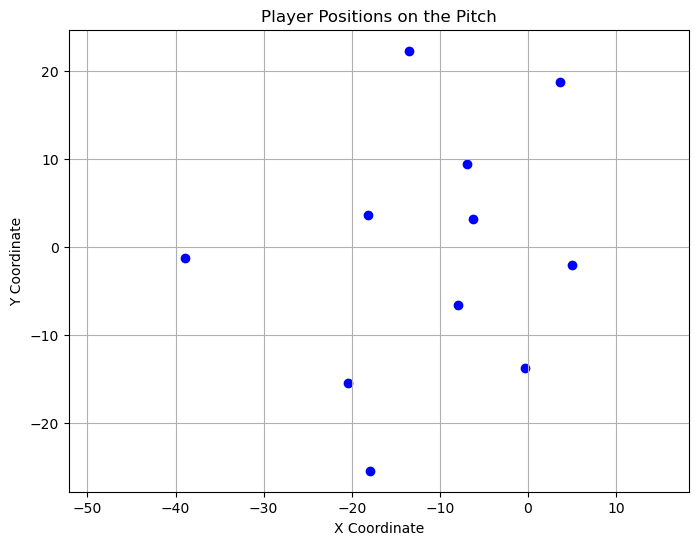

In [32]:
# good now let get the scater plot
plt.figure(figsize=(8, 6))
plt.scatter(coordinates["x"], coordinates["y"], color='blue', marker='o')

# Optional: add axis labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Player Positions on the Pitch")
plt.grid(True)
plt.axis("equal")  # Keeps the aspect ratio square like a pitch

plt.show()

**Good... we get a 4-3-3 formation shape here for the Argentina team.**  